We start by importing the different module we will be using this session:
  
numpy : NumPy is the fundamental package for scientific computing in Python, you can read more about it [here](https://numpy.org/doc/stable/index.html)

matplotlib : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. You can read more about it [here](https://matplotlib.org/)

pdb : The module pdb defines an interactive source code debugger for Python programs, you can acces the documentation [here](https://docs.python.org/3/library/pdb.html)

Seeking to build from scratch, these modules will be enough for this session

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from pdb import set_trace as pb

We then look at generating data for our training case, here is an example how we might accomplish that using additional random term sampled from a uniform distributions.

We use a shape (size, 1) because we might want to use a variable number of features, the shape would then be (size, nb_features)

In [19]:
size = 100
a=2.5
b=4

x = np.random.uniform(size=(size,1))*10
y = a*x + b
y = y + 2*np.random.uniform(size = (size,1))

Now rewrite the previous code to use a standard normal distribution instead of a uniform one using [numpy.random.randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)

In [ ]:
size = 100
a=2.5
b=4

x= #your code here
y= #your code here

Then we will be splitting the dataset in two training and validation datasets, we would normally need to shuffle our data, but since it is already sampled at randomn we can just compute the corresponding indices, we will be splitting our dataset this way:

- 80% for training
- 20% for testing

read on [numpy indexing](https://numpy.org/doc/stable/user/basics.indexing.html) to find how to index the two arrays x and y

In [ ]:
l = int(size * 80/100)

train_set = #your code here
train_set_labels = #your code here

test_set = #your code here
test_set_labels = #your code here


If you ever need to shuffle an array, you can do that with the following

In [24]:
lst = list(range(10))
print(lst)
np.random.shuffle(lst)
print(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 4, 7, 1, 6, 2, 9, 3, 8, 0]


You can now plot your data using pyplot to check for errors, your output should look something like this:

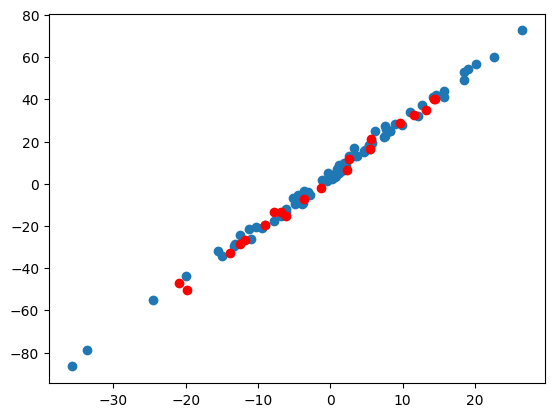

In [ ]:
plt.plot(train_set,train_set_labels,'o')
plt.plot(test_set,test_set_labels,'or')

We will now implement our perceptron for linear regression, here is the skeleton of your python class

In [ ]:
class LinearRG:
  def __init__(self,input_shape,epoch_nb,learning_rate=0.1):
    self.weights = np.random.randn(*input_shape)
    self.bias = np.random.randn(1)

    self.learning_rate = learning_rate

    self.epoch_nb = epoch_nb
    

  def inference(self,x):
    #your code here

  def MSE_loss(self,preds,y):
    #your code here

  def fit(self,x,y,x_test,y_test):
    history = {
        "loss_history" : [],
        "test_loss_history" : [],
        "weights_history" : [],
        "bias_history" : [],
    }
    for epoch in range(self.epoch_nb):
      #your code here

  def update(self,x,y,preds,loss):
    #your code here

  
    
  

Based on the equations seen in class, we will now implement each function starting by inference:

you know that the prediction of a neuron is the weighted sum: w*x +b

first implement the stand alone function and check your results, then inplement it in your class using the keyword "self" to acces members of the class

In [25]:
inpt_shape = x.shape[1:]

w = np.random.randn(*input_shape)
self.bias = np.random.randn(1)

def inference(w,b,x):
  #your code here
  out = #your code here
  return out

preds = inference(w,b,x)

2

You will then implement the MSE loss function, using np.sum, and knowing:

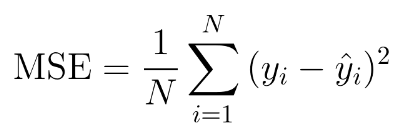

Make sure that your shape stay consistant with (size, nb_features), numpy often does a lot of abstraction on its operation and might mess up your shapes, look up numpy.reshape if necessary

In [ ]:
def MSE_loss(preds,y):
  #your code here
  loss = #your code here
  return loss

loss = MSE_loss(preds,y)

You still have the update function to code beofre you can implement the whole main loop, using these formulas from the class:

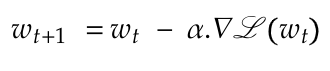

[<img src="image/jacobian_from_scratch.png" width="350"/>](image/jacobian_from_scratch.png)

In [ ]:
def update(x,y,preds,w,b):
    #your code here
    w= #your code here
    b= #your code here
    return w,b

w,b = update(x,y,preds,w,b)

Now tat you have coded the different operations used in training, you can put the corresponding functions in the original skeleton class and implement the main training loop using the algorithm recap,:

- Initialize weights at randomn sample from N(0,σ^2)

- Main loop :

  - Forward/Infere the data through the model

  - Compute the loss and gradients
  
  - Update the weights

  - Check for convergence and stop if reached

- Return model

Dont forget to make use of the history dictionary to log your training progress by using for example 
`history["loss_history"].append(loss)`

`history["weights_history"].append(self.weights)`

As well as computing and logging the loss on the test_set as well

Once you have implemented your model, you can instaciate it and test it this way

In [ ]:
model = LinearRG(train_set.shape[1:],100,learning_rate=0.001)

In [ ]:
hist = model.fit(train_set,train_set_labels,test_set,test_set_labels)

In [ ]:
plt.plot(hist["loss_history"])
plt.plot(hist["test_loss_history"])

In [ ]:
preds = model.inference(x)
plt.plot(x,preds)
plt.plot(x,y,"or")

In [ ]:
history_w = hist["weights_history"]
history_b = hist["bias_history"]
for t,(w,b) in enumerate(zip(history_w,history_b)):
    plt.plot(x, x*w+b, 'r-', alpha=t/len(history_w), label=str(t))
plt.plot(x,y,"o")

To see the impact of learning rate, you may try to instanciate another model giving it the value 1, and repeating the process above

In [ ]:
model = LinearRG(train_set.shape[1:],100,learning_rate=1)

Moreover the bias tend to need more time to converge than the weights, try to train for longer and print the model values to see if you can get back the original parameters (for exemple 1000 epochs)

In [ ]:
print(model.weights)
print(model.bias)